In [1]:
import pandas as pd
df = pd.read_csv('Cricket_chirps.csv')
print(df.shape)
df.head()

(1499, 2)


,X,Y
0,88.599998,19
1,71.599998,16
2,93.300003,22
3,84.300003,17
4,80.599998,19


In [2]:
print(df['X'].min())
print(df['X'].max())
print(df['Y'].min())
print(df['Y'].max())


62.0
93.30000305
13
22


In [3]:
for c in df.columns:
  df[c] = (df[c] - df[c].min())/(df[c].max() - df[c].min()) #min-max-normalization
df.head()

,X,Y
0,0.849840,0.666667
1,0.306709,0.333333
2,1.000000,1.000000
3,0.712460,0.444444
4,0.594249,0.666667


In [4]:
print(df['X'].min())
print(df['X'].max())
print(df['Y'].min())
print(df['Y'].max())

0.0
1.0
0.0
1.0


In [5]:
def split_data(df, val_size, test_size):
   df = df.sample(frac=1)
   n = len(df)
   train_size = int((1-val_size-test_size)*n)
   val_size = int(n*val_size)  
   test_size = int(n*test_size)

   return df[:train_size], df[train_size:train_size+val_size], df[train_size+val_size:]

In [6]:
train, val, test = split_data(df, 0.2, 0.2)
print(train.shape)
print(val.shape)
print(test.shape)

(899, 2)
(299, 2)
(301, 2)


In [7]:
import numpy as np


In [24]:
class simple_linreg:
  def __init__(self, lr):
    self.w0 = np.random.rand()
    self.w1 = np.random.rand()
    self.lr = lr
    self.train_mse = []

  def predict(self,x):
    preds = []
    for i in x:
      preds.append(self.w0+self.w1*i)
    return preds
  
  def learn(self, df, epochs):
    x = [i[0] for i in df.values]
    y = [i[1] for i in df.values]

    for i in range(epochs):
      h = self.predict(x)
      mse = MSE(y, h)
      self.train_mse.append(mse)
      print(f"train MSE at epoch {i} = {mse}")
      temp = 0.0
      size = len(df)
      for i in range(size):
        temp += (h[i] - y[i]) * x[i]
      self.w1 -= self.lr*(1/float(size))*temp 
      temp = 0.0
      for i in range(size):
        temp += (h[i] - y[i]) * 1
      self.w0 -= self.lr*(1/float(size))*temp

In [25]:
def MSE(actual_y, hyp_y):
  s = float(0)
  for i in range(len(hyp_y)):
    s += (hyp_y[i] - actual_y[i])**2
  s /= float(len(hyp_y))
  return s

In [26]:
lr = [0.01, 0.001, 0.3, 1, 0.1]

In [27]:
val_x = [i[0] for i in val.values]
val_y = [i[0] for i in val.values]
test_x = [i[0] for i in test.values]
test_y = [i[0] for i in test.values]

In [ ]:
mses = []
for i in lr:
  model = simple_linreg(i)
  model.learn(train, 100)
  val_pred = model.predict(val_x)
  mse = MSE(val_y, val_pred)
  print("===============================")
  print(f"lr = {i}\nvalidation MSE = {mse}\n===================================")
  mses.append(mse)

print(mses)


In [ ]:
# min val MSE for model with lr = 1 with MSE = 0.01270977473927466
model = simple_linreg(1)
model.learn(train, 100)
test_p = model.predict(test_x)
mse = MSE(test_y, test_p)
print(f"test MSE = {mse}")

In [43]:
model1 = simple_linreg(0.1)
model1.learn(train, 50)
mse_train = model1.train_mse
epochs = [i for i in range(0, 50)]

train MSE at epoch 0 = 0.07900503301968846
train MSE at epoch 1 = 0.06759644340032527
train MSE at epoch 2 = 0.05876997718416977
train MSE at epoch 3 = 0.05193502283536935
train MSE at epoch 4 = 0.04663613414767842
train MSE at epoch 5 = 0.042522095891762354
train MSE at epoch 6 = 0.03932206920393141
train MSE at epoch 7 = 0.03682719642242147
train MSE at epoch 8 = 0.03487641590334366
train MSE at epoch 9 = 0.033345523305934884
train MSE at epoch 10 = 0.03213873634902135
train MSE at epoch 11 = 0.031182190085696445
train MSE at epoch 12 = 0.03041892087120675
train MSE at epoch 13 = 0.029804998316617762
train MSE at epoch 14 = 0.029306542496307618
train MSE at epoch 15 = 0.028897423807067717
train MSE at epoch 16 = 0.02855748924483026
train MSE at epoch 17 = 0.02827119462128561
train MSE at epoch 18 = 0.02802654981560051
train MSE at epoch 19 = 0.027814305418957904
train MSE at epoch 20 = 0.02762732552593366
train MSE at epoch 21 = 0.027460104070514153
train MSE at epoch 22 = 0.02730839

In [44]:
import matplotlib.pyplot as plt

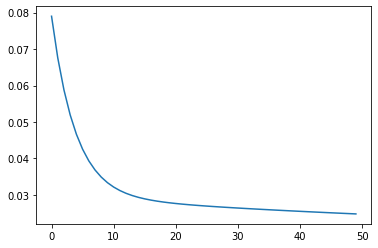

In [45]:
plt.plot(epochs, mse_train)